# Транспортная задача

  Пункты назначения  /<br>  Пункты отправления  | 40 | 60 | 40 | 50 | 50 
  ------------- |  -------------| -------------| -------------|-------------|-------------:
  **80**  | 6 | 4 | 3 | 4 | 2 
  **60**  | 3 | 6 | 4 | 9 | 2
  **100**  | 3 | 1 | 2 | 2 | 6 

### Выполним задания на python 
Преимуществом данного подхода является универсальность. 
Используя любую другую исходную матрицу, за считанные секунды получим верный результат.
 

In [1]:
# Загрузим необходимые библиотеки
import numpy as np
from scipy.optimize import linprog
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Запишем данные в массивы
a = np.array([80, 60, 100])
b = np.array([40, 60, 40, 50, 50])

D = np.array([[6, 4, 3, 4, 2],
              [3, 6, 4, 9, 2],
              [3, 1, 2, 2, 6]])

#### Реализуем метод минимального элемента:

In [3]:
# Необходима функция нахождения индексов минимального элемента матрицы
def ij(c_min):
    c = np.inf
    for i in range(c_min.shape[0]):
        for j in range(c_min.shape[1]):
            if (c_min[i, j] !=0) and (c_min[i, j]<c):
                c = c_min[i, j]
                i_, j_ = i, j
    return i_, j_

# Функция минимального элемента
def M_min(a_, b_, c_, print_ = False):
    a = np.copy(a_)
    b = np.copy(b_)
    c = np.copy(c_)
    
    # Проверяем условие замкнутости: если не замкнута - меняем соотвествующие векторы и матрицу трансп. расходов
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    x = np.zeros((m, n), dtype=int) # создаем матрицу для x и заполняем нулями
    funk = 0
    while True:
        c_min = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                c_min[i, j] = (c[i, j]*min(a[i], b[j])) # составляем матрицу суммарных расходов
        i, j = ij(c_min) # определяем индексы минимального элемента составленной матрицы суммарных расходов
        x_ij = int(min(a[i], b[j]))
        x[i, j] = x_ij # добавляем элемент x_ij в матрицу x
        funk += int(c_min[i, j]) # добавляем x_ij в итоговую функцию
        a[i] -= x_ij #
        b[j] -= x_ij # обновляем векторы a и b
        if print_:
            print('c_min:')
            print(c_min.astype(int))
            print('a: ', a)
            print('b: ', b)
            print()
        if len(c_min[c_min>0])==1: # повторяем до сходимости метода
            break
    return x, funk # возращаем матрицу x и целевую функцию

Один раз выведем на экран поэтапный процесс расчета, чтобы убедится в корректности работы алгоритма:

In [4]:
x, funk = M_min(a, b, D, print_ = True)
print('x: ')
print(x)
print('Целевая функция: ', funk)

c_min:
[[240 240 120 200 100]
 [120 360 160 450 100]
 [120  60  80 100 300]]
a:  [80 60 40]
b:  [40  0 40 50 50]

c_min:
[[240   0 120 200 100]
 [120   0 160 450 100]
 [120   0  80  80 240]]
a:  [80 60  0]
b:  [40  0  0 50 50]

c_min:
[[240   0   0 200 100]
 [120   0   0 450 100]
 [  0   0   0   0   0]]
a:  [30 60  0]
b:  [40  0  0 50  0]

c_min:
[[180   0   0 120   0]
 [120   0   0 450   0]
 [  0   0   0   0   0]]
a:  [ 0 60  0]
b:  [40  0  0 20  0]

c_min:
[[  0   0   0   0   0]
 [120   0   0 180   0]
 [  0   0   0   0   0]]
a:  [ 0 20  0]
b:  [ 0  0  0 20  0]

c_min:
[[  0   0   0   0   0]
 [  0   0   0 180   0]
 [  0   0   0   0   0]]
a:  [0 0 0]
b:  [0 0 0 0 0]

x: 
[[ 0  0  0 30 50]
 [40  0  0 20  0]
 [ 0 60 40  0  0]]
Целевая функция:  660


#### Метод северо-западного угла:

In [5]:
def sev_zap(a_, b_, c_):
    a = np.copy(a_)
    b = np.copy(b_)
    c = np.copy(c_)
    
    # Проверяем условие замкнутости:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    i = 0
    j = 0
    funk = 0
    x = np.zeros((m, n), dtype=int)
    while (i<m) and (j<n): # повторяем цикл до сходимости метода
        x_ij = min(a[i], b[j]) # проверяем минимальность a_i и b_j
        funk += c[i, j]*min(a[i], b[j]) # записываем в итоговую функцию элемент трат
        a[i] -= x_ij #
        b[j] -= x_ij # обновляем векторы a и b
        x[i, j] = x_ij # добавляем элемент x_ij в матрицу x
    
        if a[i]>b[j]: # делаем сдвиги при выполнении условий
            j += 1
        elif a[i]<b[j]:
            i += 1
        else:
            i += 1
            j += 1
    return x, funk # возращаем матрицу x и целевую функцию

#### Метод потенциалов:

In [6]:
# Для метода потенциалов потребуется матрица дельт
# На вход она получает x - матрицу одного из опорных методов
def delta(a, b, c, x): 
        # Проверяем условие замкнутости:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
    
    m = len(a)
    n = len(b)
    
    u = np.zeros(m)
    v = np.zeros(n)

    for i in range(m):
        for j in range(n):
            if x[i, j] != 0: # если элемент матрицы x не равен 0, расчитываем для данных индексов векторы u и v
                if v[j] != 0:
                    u[i] = c[i, j]-v[j]
                else:
                    v[j] = c[i, j]-u[i]

    delta = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            delta[i, j] = u[i] + v[j] - c[i, j] # расчитываем элемент дельта матрицы
    return delta

In [7]:
# Функция возвращает матрицу системы ограничений
def prepare(a, b):
    m = len(a)
    n = len(b)
    h = np.diag(np.ones(n))
    v = np.zeros((m, n))
    v[0] = 1
    for i in range(1, m):
        h = np.hstack((h, np.diag(np.ones(n))))
        k = np.zeros((m, n))
        k[i]=1
        v = np.hstack((v, k))
    return np.vstack((h, v)).astype(int), np.hstack((b,a))

# Метод потенциалов
def potenz(a_, b_, c_):
    a = np.copy(a_)
    b = np.copy(b_)
    c = np.copy(c_)
    # Проверяем условие замкнутости:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    A_eq, b_eq = prepare(a, b)
    res = linprog(c.reshape(1, -1), A_eq=A_eq, b_eq=b_eq, bounds=(0, None), method='simplex')
    return res.x.astype(int).reshape(m, n), res.fun.astype(int) # возращаем матрицу x и целевую функцию

Посмотрим на матрицу системы ограничений для нашего случая:

In [8]:
print('Матрица системы ограничений: \n', prepare(a, b)[0])

Матрица системы ограничений: 
 [[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]]


#### Теперь все функции готовы, осталось применить

Задача сбалансирована:
$$\sum a = \sum b = 240$$

$$c_{ij} = \gamma d_{ij}$$

где $\gamma$ - цена перевозки на 1км. Так как $\gamma = const$, на минимизацию целевой функции не влияет.

In [9]:
x, funk = M_min(a, b, D)
print('Метод минимального элемента: \n', x)
print('Целевая функция: ', funk)
print()
print('Дельта матрица для М - метода: \n', delta(a, b, D, x))

Метод минимального элемента: 
 [[ 0  0  0 30 50]
 [40  0  0 20  0]
 [ 0 60 40  0  0]]
Целевая функция:  660

Дельта матрица для М - метода: 
 [[-3. -3. -1.  0.  0.]
 [ 5.  0.  3.  0.  5.]
 [ 0.  0.  0.  2. -4.]]


In [10]:
x1, funk1 = sev_zap(a, b, D)
print('Метод северо-западного угла: \n', x1)
print('Целевая функция: ', funk1)
print()
print('Дельта матрица для метода северо-западного угла: \n', delta(a, b, D, x1))

Метод северо-западного угла: 
 [[40 40  0  0  0]
 [ 0 20 40  0  0]
 [ 0  0  0 50 50]]
Целевая функция:  1080

Дельта матрица для метода северо-западного угла: 
 [[ 0.  0. -1. -2.  4.]
 [ 5.  0.  0. -5.  6.]
 [ 3.  3.  0.  0.  0.]]


Оба метода не оптимальны, так как дельта-матрицы содержат положительные элементы

Так же по целевой функции видно, что метод северо-западного угла гораздо хуже справляется со своей задачей, чем М-метод, что было понятно еще на этапе построения, ведь алгоритм первого не использует матрицу расходов при построении, только при вычислении общих расходов. У нас как раз в матрице $D$ на главных диагоналях значения больше, чем по краям, потому и получается такая большая разница в методах.

In [11]:
x2, funk2 = potenz(a, b, D)
print('Метод потенциалов: \n', x2)
print('Целевая функция: ', funk2)
print()
print('Дельта матрица для метода потенциалов: \n', delta(a, b, D, x2))

Метод потенциалов: 
 [[ 0  0 40 10 30]
 [40  0  0  0 20]
 [ 0 60  0 40  0]]
Целевая функция:  520

Дельта матрица для метода потенциалов: 
 [[-3. -3.  0.  0.  0.]
 [ 0. -5. -1. -5.  0.]
 [-2. -2. -1.  0. -6.]]


Метод потенциалов дал оптимальный результат

Построим граф оптимального плана перевозок:

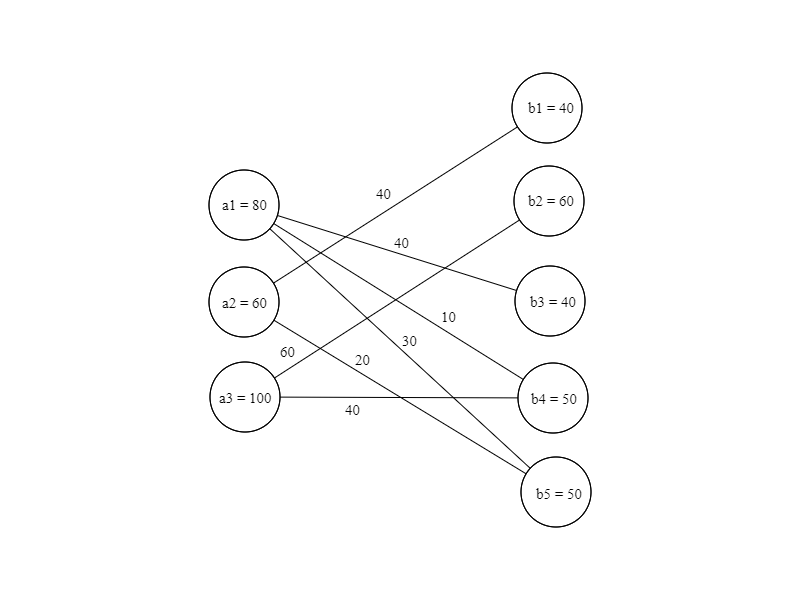

#### Теперь будем решать несбалансированную задачу
Уменьшим $b_5$ на 10:

In [12]:
b[4] -= 10
b

array([40, 60, 40, 50, 40])

$$\sum a =240 \not= \sum b = 230$$

In [13]:
x1, funk1 = sev_zap(a, b, D)
print('Метод северо-западного угла: \n', x1)
print('Целевая функция: ', funk1)
print()
print('Дельта матрица для метода северо-западного угла: \n', delta(a, b, D, x1))

Метод северо-западного угла: 
 [[40 40  0  0  0  0]
 [ 0 20 40  0  0  0]
 [ 0  0  0 50 40 10]]
Целевая функция:  1020.0

Дельта матрица для метода северо-западного угла: 
 [[ 0.  0. -1. -2.  4.  0.]
 [ 5.  0.  0. -5.  6.  2.]
 [ 3.  3.  0.  0.  0.  0.]]


In [14]:
x2, funk2 = potenz(a, b, D)
print('Метод потенциалов: \n', x2)
print('Целевая функция: ', funk2)
print()
print('Дельта матрица для метода потенциалов: \n', delta(a, b, D, x2))

Метод потенциалов: 
 [[ 0  0 40 10 20 10]
 [40  0  0  0 20  0]
 [ 0 60  0 40  0  0]]
Целевая функция:  500

Дельта матрица для метода потенциалов: 
 [[-3. -3.  0.  0.  0.  0.]
 [ 0. -5. -1. -5.  0.  0.]
 [-2. -2. -1.  0. -6. -2.]]


Теперь увеличим  $b_5$  на 10 относительно изначального:

In [15]:
b[4] += 20
b

array([40, 60, 40, 50, 60])

$$\sum a =240 \not= \sum b = 250$$

In [16]:
x1, funk1 = sev_zap(a, b, D)
print('Метод северо-западного угла: \n', x1)
print('Целевая функция: ', funk1)
print()
print('Дельта матрица для метода северо-западного угла: \n', delta(a, b, D, x1))

Метод северо-западного угла: 
 [[40 40  0  0  0]
 [ 0 20 40  0  0]
 [ 0  0  0 50 50]
 [ 0  0  0  0 10]]
Целевая функция:  1080.0

Дельта матрица для метода северо-западного угла: 
 [[ 0.  0. -1. -2.  4.]
 [ 5.  0.  0. -5.  6.]
 [ 3.  3.  0.  0.  0.]
 [ 0. -2. -4. -4.  0.]]


In [17]:
x2, funk2 = potenz(a, b, D)
print('Метод потенциалов: \n', x2)
print('Целевая функция: ', funk2)
print()
print('Дельта матрица для метода потенциалов: \n', delta(a, b, D, x2))

Метод потенциалов: 
 [[ 0  0 40  0 40]
 [40  0  0  0 20]
 [ 0 60  0 40  0]
 [ 0  0  0 10  0]]
Целевая функция:  500

Дельта матрица для метода потенциалов: 
 [[-3. -3.  0. -2.  0.]
 [ 0. -5. -1. -7.  0.]
 [ 0.  0.  1.  0. -4.]
 [ 1. -1.  1.  0.  0.]]
